In [1]:
import numpy as np
import pandas as pd

In [2]:
inventor_df = pd.read_csv('C:/Users/aarus/Downloads/g_inventor_disambiguated.tsv/g_inventor_disambiguated.tsv',sep='\t')
location_df = pd.read_csv('C:/Users/aarus/Downloads/g_location_disambiguated.tsv/g_location_disambiguated.tsv',sep='\t')

In [ ]:
inventor_df.info()

In [3]:
inventor_df=inventor_df.drop(['disambig_inventor_name_first', 'disambig_inventor_name_last', 'inventor_sequence'], axis=1)
inventor_df=inventor_df.sort_values(by=['inventor_id'])

In [4]:
patent_count= inventor_df.groupby('inventor_id')['patent_id'].count().reset_index()
patent_count.columns = ['inventor_id', 'patent_count']
inventor_df = pd.merge(inventor_df, patent_count, on='inventor_id', how='left')
inventor_df = pd.merge(inventor_df, location_df, on='location_id', how='left')

In [5]:
df_temp= inventor_df.drop('patent_id', axis=1)
df_temp= df_temp.drop_duplicates()
most_common_location = df_temp.groupby('inventor_id')['location_id'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA).reset_index()
most_common_location.columns = ['inventor_id', 'most_common_location_id']

df_temp = pd.merge(df_temp, most_common_location, on='inventor_id', how='left')
df_temp = df_temp.drop(['disambig_city', 'disambig_state', 'disambig_country', 'latitude', 'longitude', 'county', 'state_fips', 'county_fips'], axis=1)
df_temp = df_temp.merge(location_df, left_on='most_common_location_id', right_on='location_id', how='left')
df_temp= df_temp.drop_duplicates(subset=['inventor_id'])

In [6]:
sampled_inventors = df_temp.sample(n=100000, random_state=1)

Plotting Inventors across the globe with colour intensity denoting patent count

C:\Users\aarus\AppData\Local\Temp\ipykernel_9664\1114907786.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


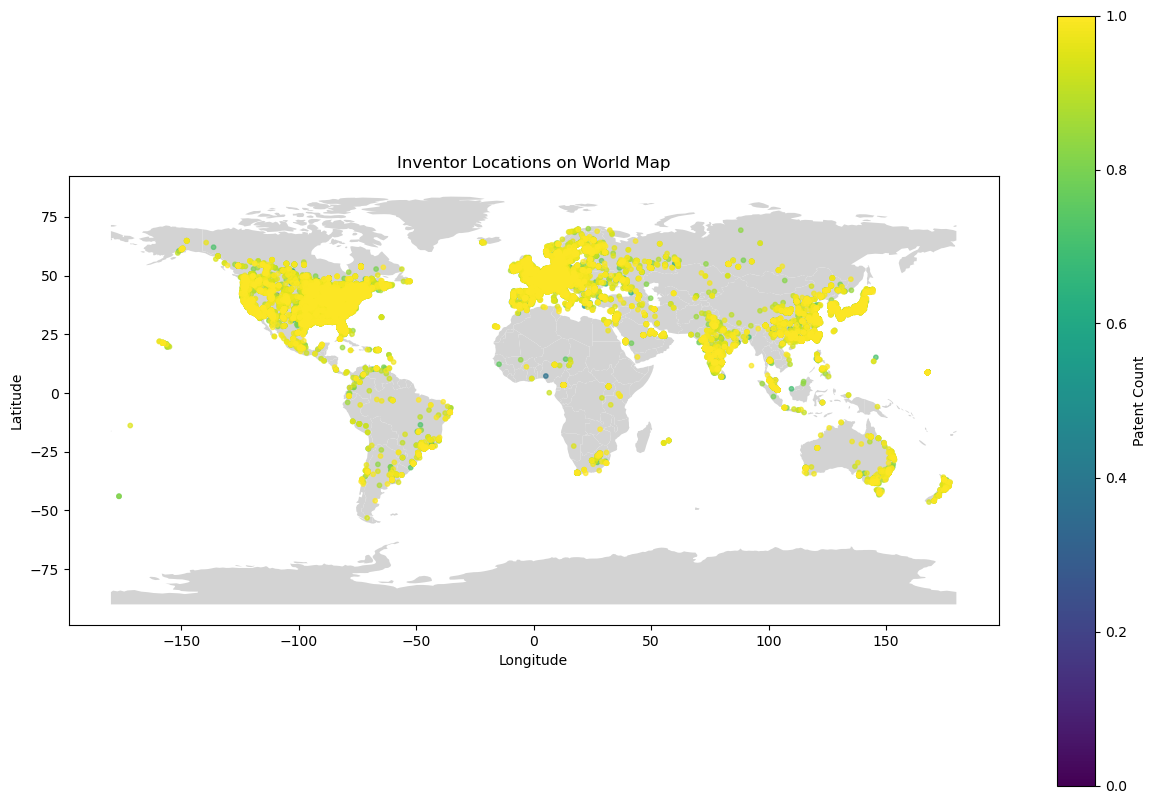

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import geopandas as gpd

gdf = gpd.GeoDataFrame(sampled_inventors, 
                       geometry=gpd.points_from_xy(sampled_inventors.longitude, sampled_inventors.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')

gdf.plot(ax=ax, marker='o', alpha=0.7, cmap='viridis', markersize=10, norm=LogNorm(), c='patent_count', legend=True)

cbar = plt.colorbar(ax.collections[0], label='Patent Count', orientation='vertical')
ax.set_title('Inventor Locations on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [14]:
sampled_inventors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3146338 to 4028829
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   inventor_id              100000 non-null  object 
 1   gender_code              98924 non-null   object 
 2   location_id_x            98964 non-null   object 
 3   patent_count             100000 non-null  int64  
 4   most_common_location_id  99346 non-null   object 
 5   location_id_y            99346 non-null   object 
 6   disambig_city            99342 non-null   object 
 7   disambig_state           49797 non-null   object 
 8   disambig_country         99345 non-null   object 
 9   latitude                 99346 non-null   float64
 10  longitude                99346 non-null   float64
 11  county                   46920 non-null   object 
 12  state_fips               46920 non-null   float64
 13  county_fips              46920 non-null   float64
dtypes:

C:\Users\aarus\AppData\Local\Temp\ipykernel_9664\793939732.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


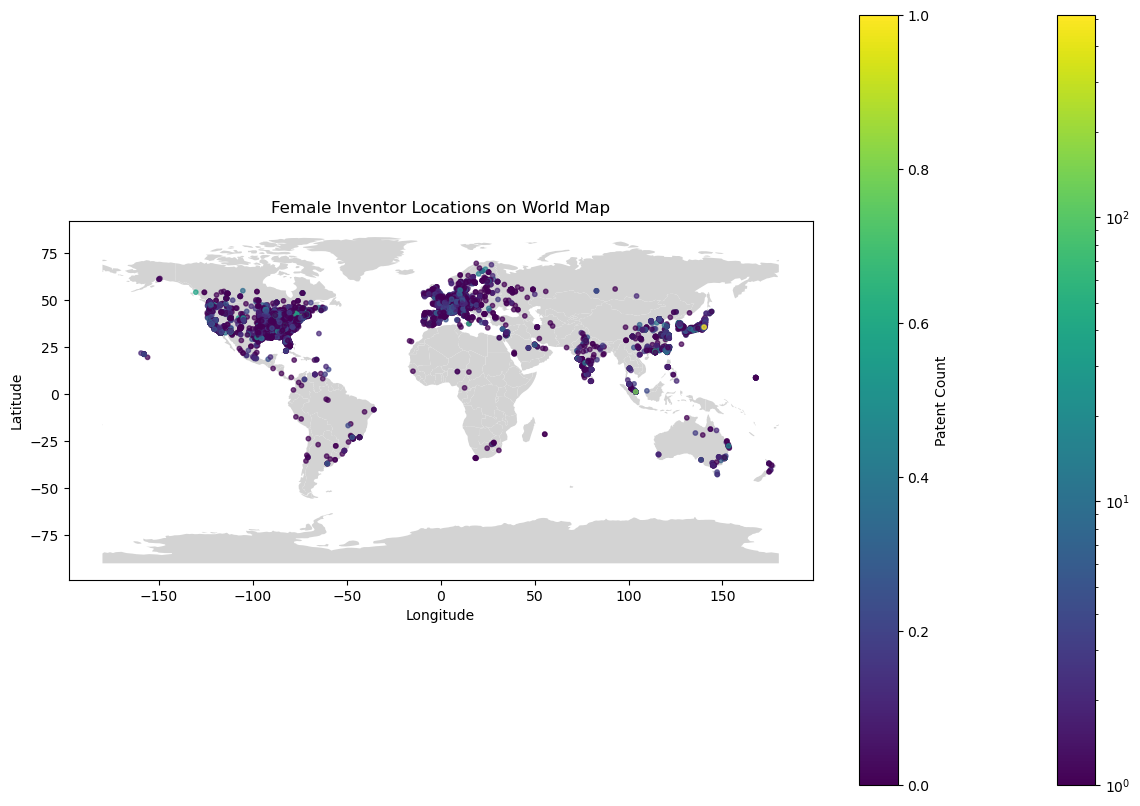

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import geopandas as gpd

female_inventors = sampled_inventors[sampled_inventors['gender_code'] == 'F']

gdf_female = gpd.GeoDataFrame(female_inventors, 
                              geometry=gpd.points_from_xy(female_inventors.longitude, female_inventors.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
gdf_female.plot(ax=ax, marker='o', alpha=0.7, cmap='viridis', markersize=10, 
                norm=LogNorm(), column='patent_count', legend=True)

cbar = plt.colorbar(ax.collections[0], label='Patent Count', orientation='vertical')
ax.set_title('Female Inventor Locations on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


C:\Users\aarus\AppData\Local\Temp\ipykernel_9664\4193178034.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


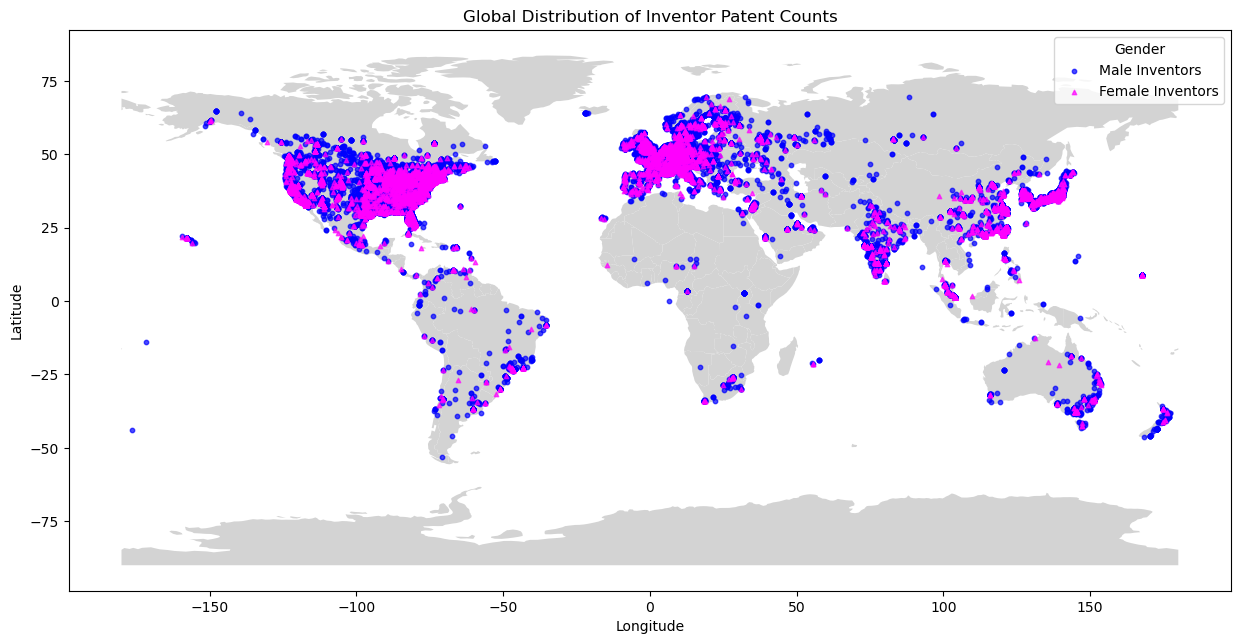

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import geopandas as gpd

# Creating GeoDataFrames for male and female inventors
male_inventors = sampled_inventors[sampled_inventors['gender_code'] == 'M']
female_inventors = sampled_inventors[sampled_inventors['gender_code'] == 'F']

gdf_male = gpd.GeoDataFrame(male_inventors, 
                            geometry=gpd.points_from_xy(male_inventors.longitude, male_inventors.latitude))

gdf_female = gpd.GeoDataFrame(female_inventors, 
                              geometry=gpd.points_from_xy(female_inventors.longitude, female_inventors.latitude))

# Reading a world map shape file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')

# Plotting male inventors
gdf_male.plot(ax=ax, marker='o', color='blue', alpha=0.7, markersize=10, 
              label='Male Inventors', legend=True)

# Plotting female inventors
gdf_female.plot(ax=ax, marker='^', color='magenta', alpha=0.7, markersize=10, 
                label='Female Inventors', legend=True)

# Title and labels
ax.set_title('Global Distribution of Inventor Patent Counts')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Legend
ax.legend(title='Gender')

plt.show()


C:\Users\aarus\AppData\Local\Temp\ipykernel_9664\3435705910.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


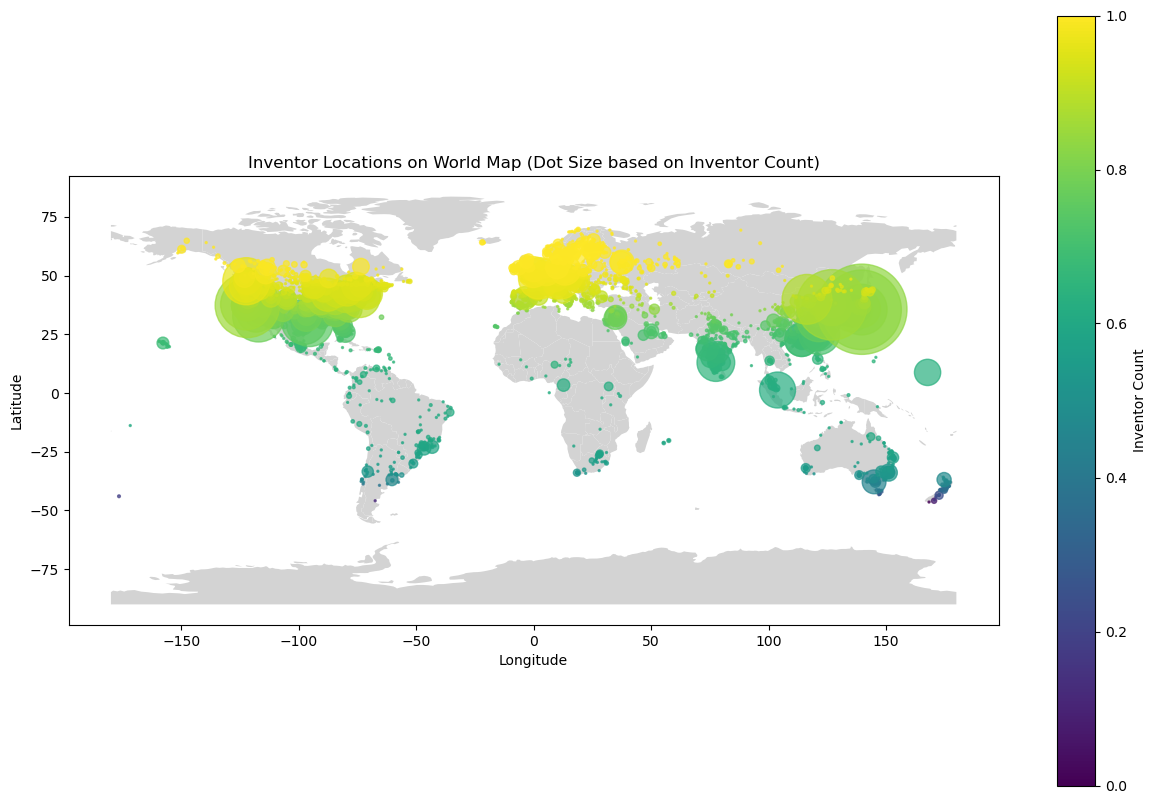

In [9]:
location_counts = sampled_inventors.groupby(['latitude', 'longitude']).size().reset_index(name='inventor_count')

gdf = gpd.GeoDataFrame(location_counts, 
                       geometry=gpd.points_from_xy(location_counts.longitude, location_counts.latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, marker='o', alpha=0.7, cmap='viridis', markersize=gdf['inventor_count']*2, norm=LogNorm(), legend=True)

cbar = plt.colorbar(ax.collections[0], label='Inventor Count', orientation='vertical')
ax.set_title('Inventor Locations on World Map (Dot Size based on Inventor Count)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


C:\Users\aarus\AppData\Local\Temp\ipykernel_9664\2125469581.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


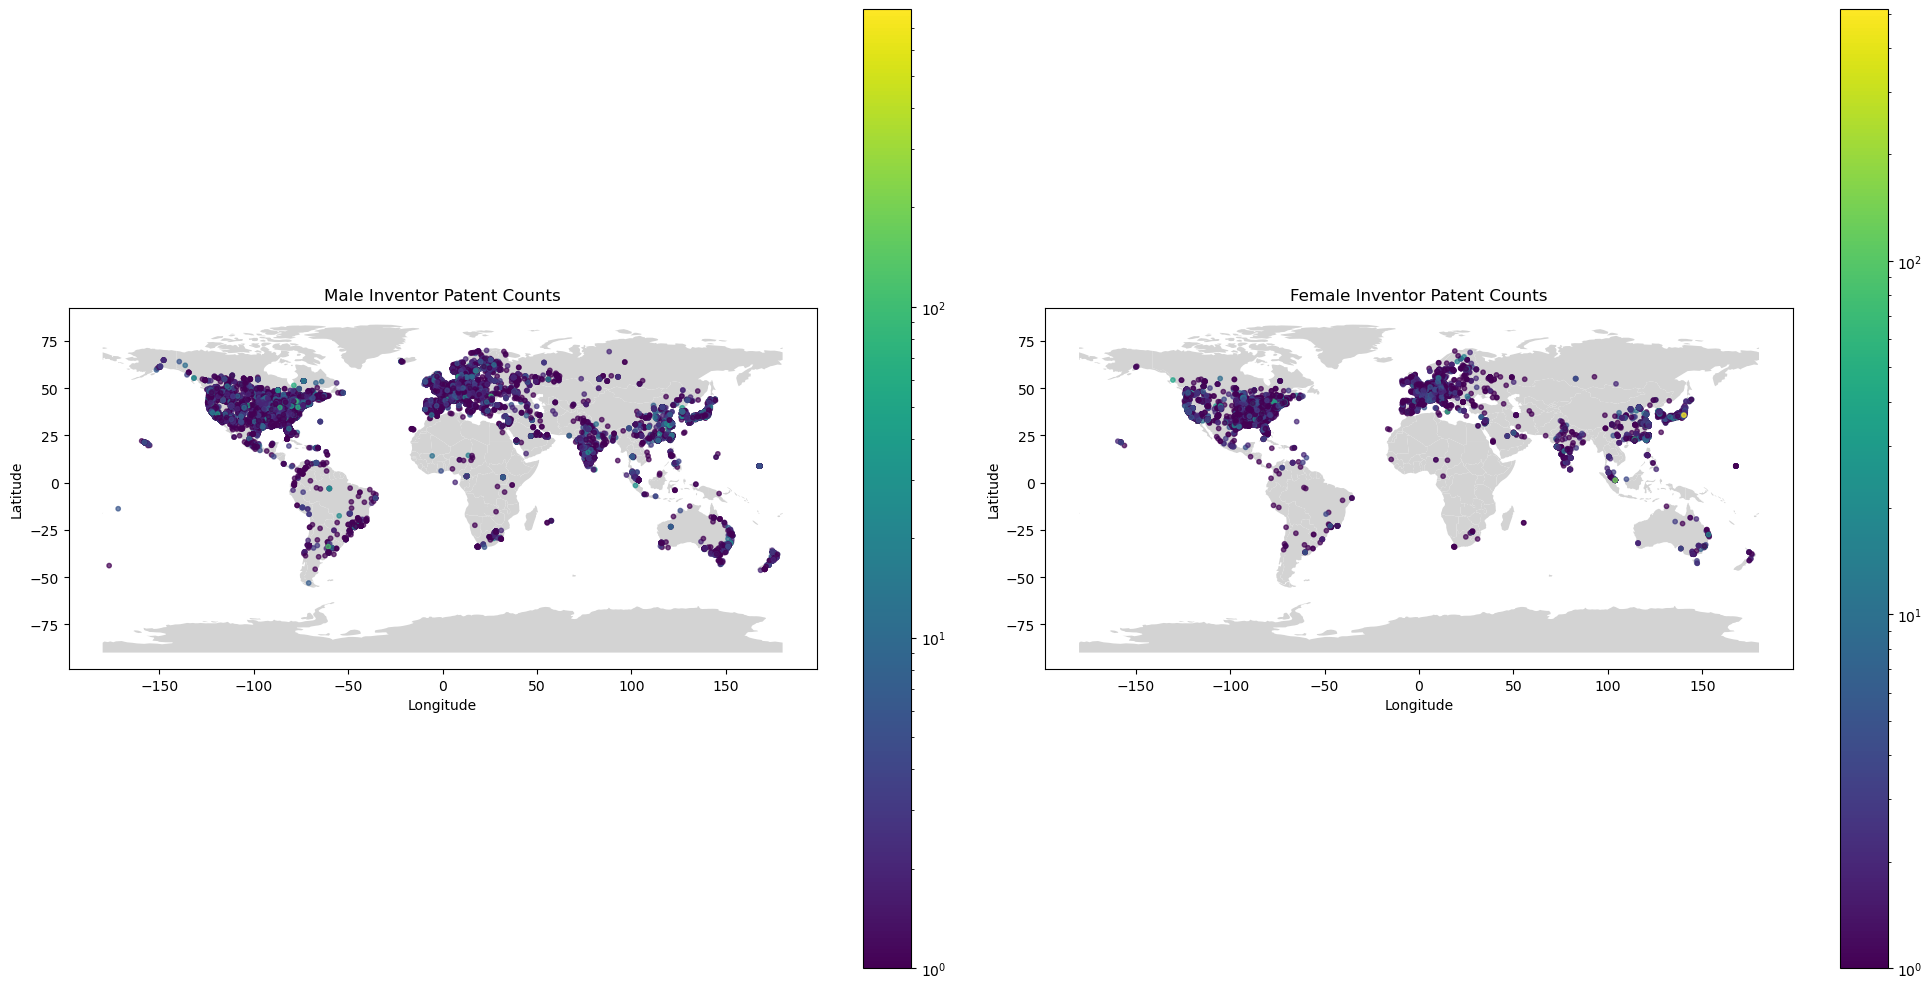

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import geopandas as gpd

# Creating GeoDataFrames for male and female inventors
male_inventors = sampled_inventors[sampled_inventors['gender_code'] == 'M']
female_inventors = sampled_inventors[sampled_inventors['gender_code'] == 'F']

gdf_male = gpd.GeoDataFrame(male_inventors, 
                            geometry=gpd.points_from_xy(male_inventors.longitude, male_inventors.latitude))

gdf_female = gpd.GeoDataFrame(female_inventors, 
                              geometry=gpd.points_from_xy(female_inventors.longitude, female_inventors.latitude))

# Reading a world map shape file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plotting male inventors
world.plot(ax=axes[0], color='lightgray')
gdf_male.plot(ax=axes[0], marker='o', alpha=0.7, cmap='viridis', 
              markersize=10, norm=LogNorm(), column='patent_count', legend=True)
axes[0].set_title('Male Inventor Patent Counts')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Plotting female inventors
world.plot(ax=axes[1], color='lightgray')
gdf_female.plot(ax=axes[1], marker='o', alpha=0.7, cmap='viridis', 
                markersize=10, norm=LogNorm(), column='patent_count', legend=True)
axes[1].set_title('Female Inventor Patent Counts')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()


C:\Users\aarus\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\aarus\AppData\Local\Temp\ipykernel_9664\1729087626.py:10: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  gdf_us_states = gpd.sjoin(gdf, us_states, how='left', op='within')


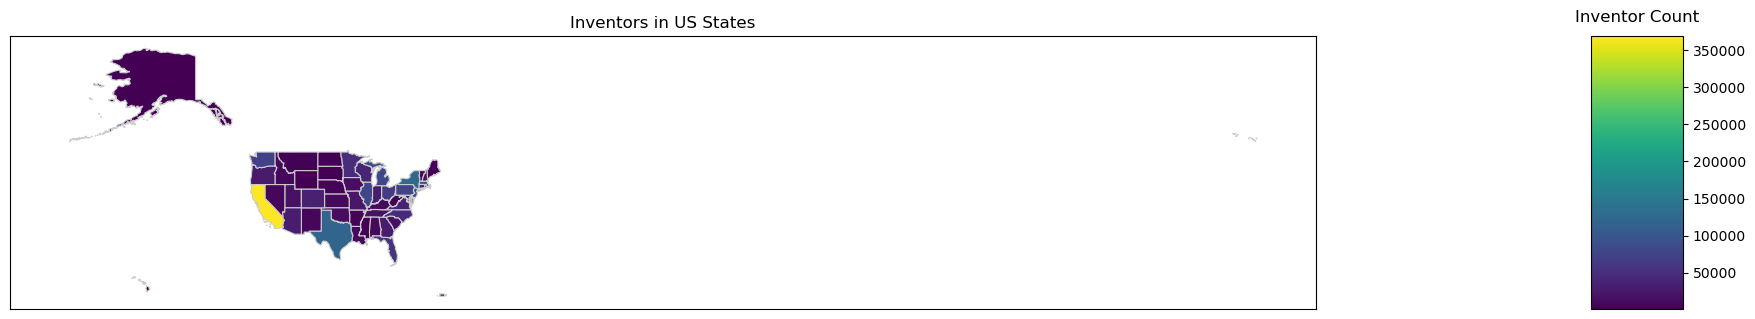

In [10]:
df_temp2 = df_temp[df_temp['disambig_country'] == 'US']

from mpl_toolkits.axes_grid1 import make_axes_locatable

us_states = gpd.read_file('C:/Users/aarus/Downloads/cb_2021_us_state_20m/cb_2021_us_state_20m.shp')


gdf = gpd.GeoDataFrame(df_temp2, 
                       geometry=gpd.points_from_xy(df_temp2.longitude, df_temp2.latitude))
gdf_us_states = gpd.sjoin(gdf, us_states, how='left', op='within')
state_counts = gdf_us_states.groupby('STUSPS').size().reset_index(name='inventor_count')
us_states = us_states.merge(state_counts, left_on='STUSPS', right_on='STUSPS', how='left')

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(25, 20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

us_states.plot(column='inventor_count', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
cax.set_title('Inventor Count', pad=10)
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Inventors in US States')

plt.show()
